In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = [ 'Federal District', ' State of Acre,State of Alagoas,State of Amapá', 'State of Amazonas', 
                    'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
                    'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais',
                    'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí', 
                    'State of Rio de Janeiro', 'State of Rio Grande do Norte',
                    'State of Rio Grande do Sul', 'State of Rondônia', 'State of Roraima', 'State of Santa Catarina', 
                    'State of São Paulo', 'State of Sergipe', 'State of Tocantins'
                  ]

{'State of São Paulo':         country_region_code country_region        sub_region_1 sub_region_2  \
1321388                  BR         Brazil  State of São Paulo          NaN   
1321389                  BR         Brazil  State of São Paulo          NaN   
1321390                  BR         Brazil  State of São Paulo          NaN   
1321391                  BR         Brazil  State of São Paulo          NaN   
1321392                  BR         Brazil  State of São Paulo          NaN   
...                     ...            ...                 ...          ...   
1321896                  BR         Brazil  State of São Paulo          NaN   
1321897                  BR         Brazil  State of São Paulo          NaN   
1321898                  BR         Brazil  State of São Paulo          NaN   
1321899                  BR         Brazil  State of São Paulo          NaN   
1321900                  BR         Brazil  State of São Paulo          NaN   

        metro_area iso_3166_

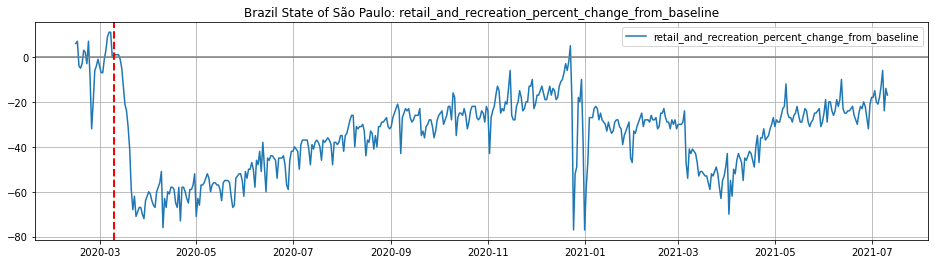

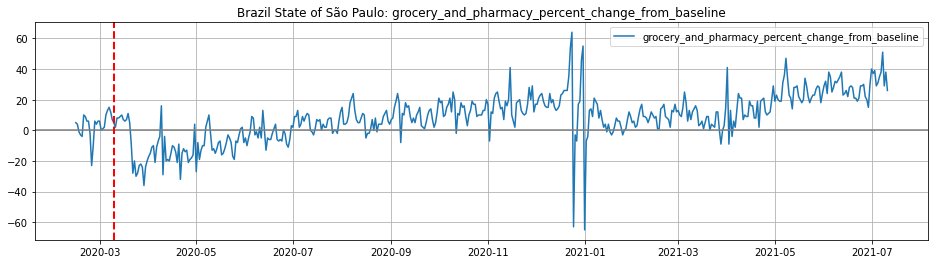

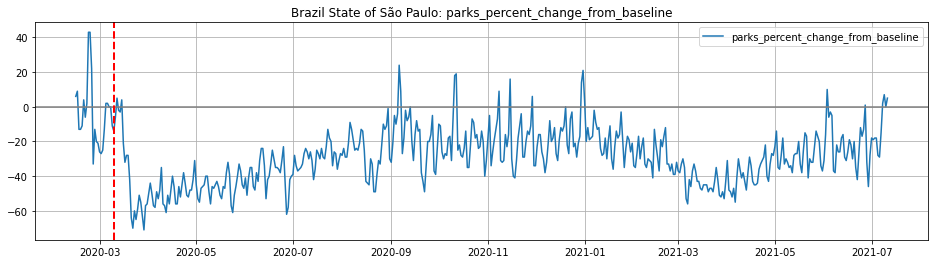

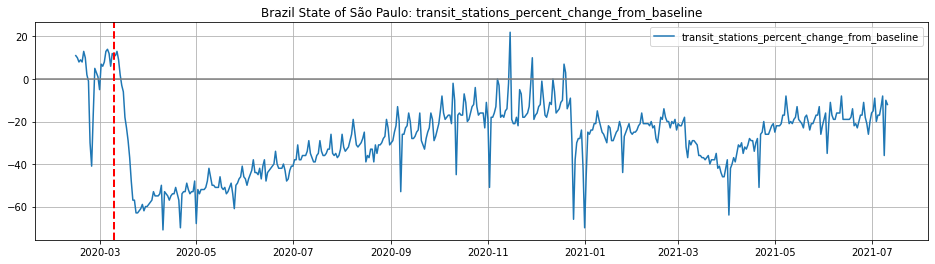

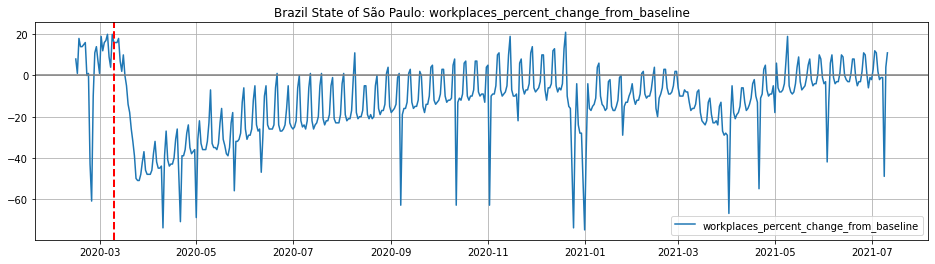

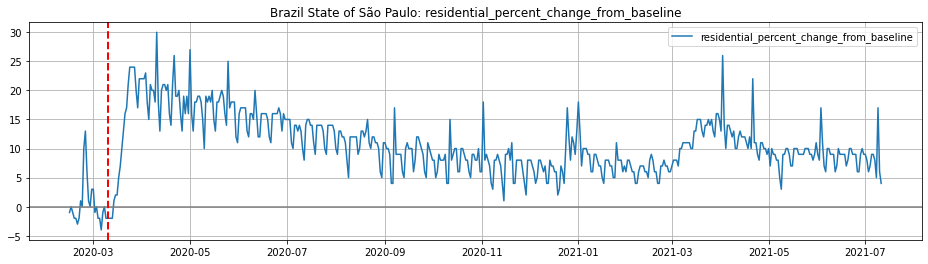

In [4]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r in regions_list:
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==r) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
sdf = getAllRegionsGroups(regions_list=['State of São Paulo'])   #, 'State of Rio de Janeiro'
print(sdf)
plotGroups(sdf['State of São Paulo'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [5]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}

#     print(regions_list)
    for r in regions_list:
        sub_df = covid_df[(covid_df['state']== 'SP')]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13701       128  2021-07-14  Brazil     SC  TOTAL         35   17445   
13702       128  2021-07-14  Brazil     SE  TOTAL          8    5837   
13703       128  2021-07-14  Brazil     SP  TOTAL        519  133364   
13704       128  2021-07-14  Brazil     TO  TOTAL          0    3364   
13705       128  2021-07-14  Brazil  TOTAL  TOTAL       1484  537693   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [6]:
sp_covid = getAllRegionsCovid(['State of São Paulo'])
newCases = sp_covid['State of São Paulo']['newCases'].values
covid_dates = sp_covid['State of São Paulo']['date'].values

mob_df = getAllRegionsGroups(regions_list=['State of São Paulo'])['State of São Paulo']
mob_dates = mob_df['date'].values
mob_dates += np.timedelta64(7,'D') # com offset de 7 dias
newCases_norm = newCases/np.max(newCases)

scaler = MinMaxScaler(feature_range=(-1,1))
mobility_norm = scaler.fit_transform(mob_df[categories_google_mobility].values)

retail_and_recreation_percent_change_from_baseline


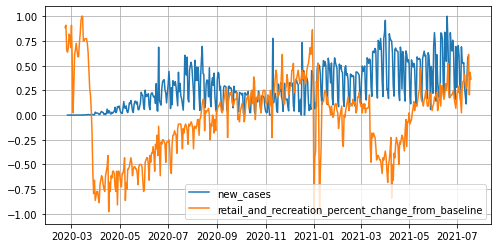

grocery_and_pharmacy_percent_change_from_baseline


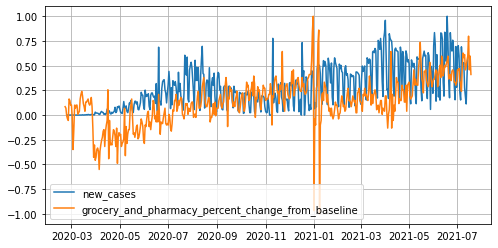

parks_percent_change_from_baseline


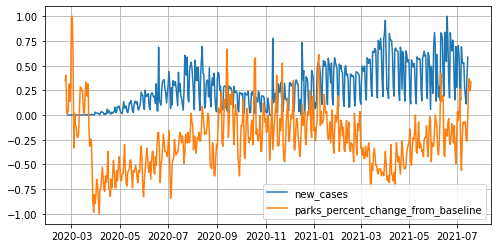

transit_stations_percent_change_from_baseline


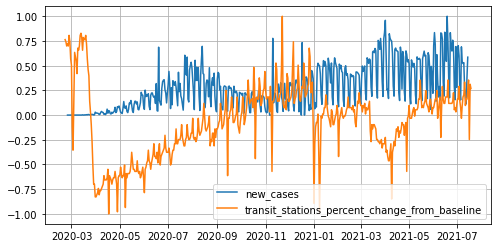

workplaces_percent_change_from_baseline


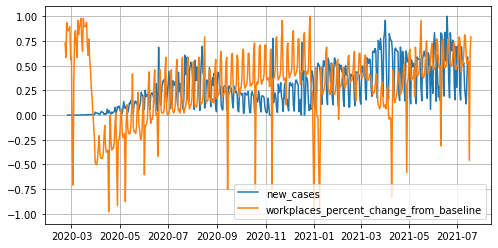

residential_percent_change_from_baseline


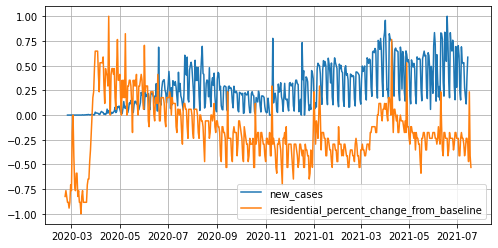

In [7]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(covid_dates[:], newCases_norm[:], label="new_cases")
    plt.plot(mob_dates[:], group_values[:], label=group)
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

retail_and_recreation_percent_change_from_baseline


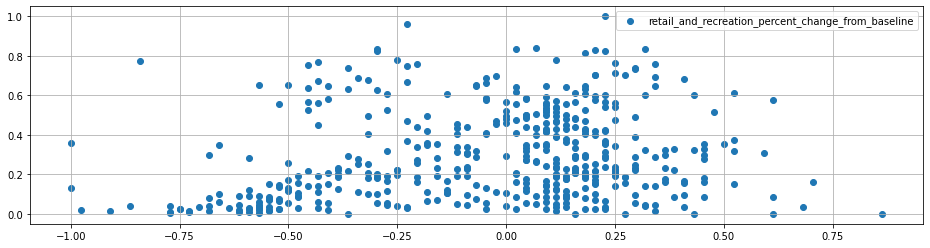

grocery_and_pharmacy_percent_change_from_baseline


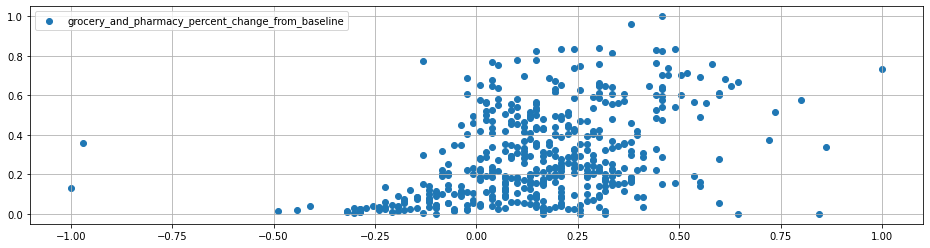

parks_percent_change_from_baseline


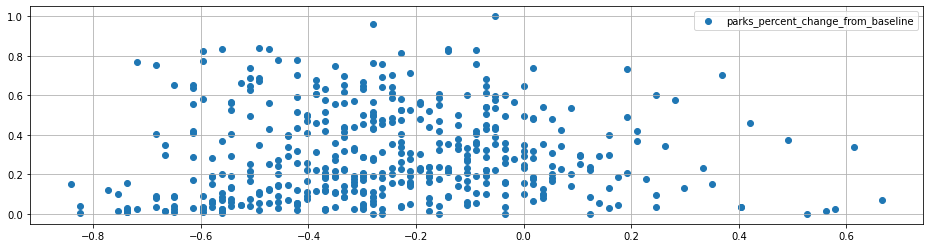

transit_stations_percent_change_from_baseline


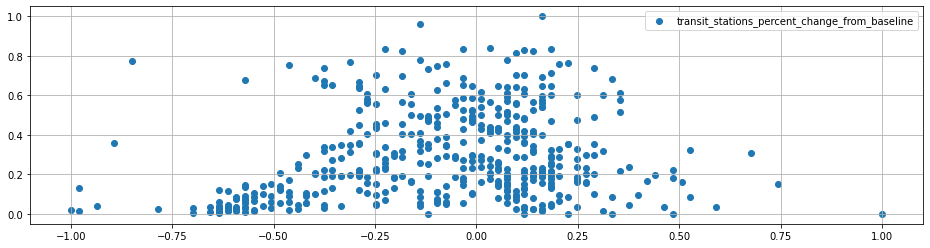

workplaces_percent_change_from_baseline


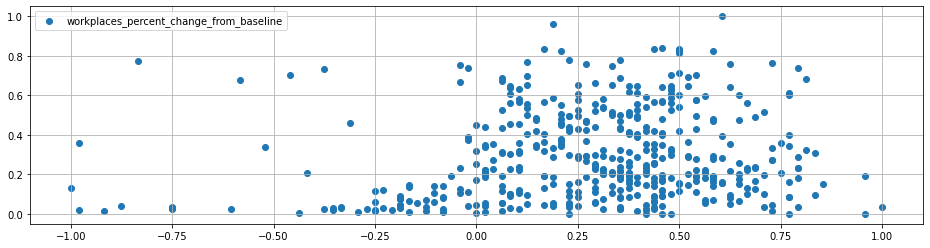

residential_percent_change_from_baseline


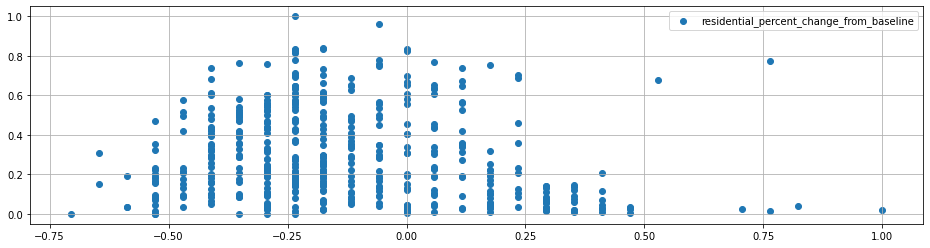

In [8]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.scatter(group_values[-460:], newCases_norm[-470:-10], label=group) #com offset de 7 dias
#     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

In [24]:
from keras.models import Sequential
from keras.layers import Dense

X = mobility_norm[-460:,:]
Y = newCases_norm[-470:-10]
Y = Y.reshape((len(Y),1))
print(Y)

model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=400, batch_size=50)

# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

[[0.02317188]
 [0.01894896]
 [0.01956255]
 [0.01508698]
 [0.00555836]
 [0.00887894]
 [0.0294521 ]
 [0.03703169]
 [0.027864  ]
 [0.02656464]
 [0.00732693]
 [0.01212734]
 [0.00505306]
 [0.01718039]
 [0.06034794]
 [0.01894896]
 [0.04594673]
 [0.03800621]
 [0.01346279]
 [0.01129719]
 [0.02905508]
 [0.01909334]
 [0.02981304]
 [0.03919729]
 [0.07861113]
 [0.02566231]
 [0.03540749]
 [0.08463871]
 [0.07640944]
 [0.09167689]
 [0.06049231]
 [0.02887461]
 [0.02158377]
 [0.0149787 ]
 [0.06735003]
 [0.13715441]
 [0.07489352]
 [0.06864939]
 [0.09315672]
 [0.03728434]
 [0.02479607]
 [0.0573161 ]
 [0.12192305]
 [0.11510142]
 [0.14769364]
 [0.10124161]
 [0.04194037]
 [0.02602324]
 [0.10571717]
 [0.13946438]
 [0.14004187]
 [0.11304411]
 [0.13307587]
 [0.0578575 ]
 [0.05284054]
 [0.08633509]
 [0.12509926]
 [0.23034722]
 [0.20540677]
 [0.20161698]
 [0.09225439]
 [0.05767704]
 [0.25261676]
 [0.18725186]
 [0.2063452 ]
 [0.19364037]
 [0.2159821 ]
 [0.0910994 ]
 [0.05486176]
 [0.20013715]
 [0.22298419]
 [0.22

10/10 [==============================] - 0s 1ms/step - loss: 4.7244 - accuracy: 0.0098
Epoch 19/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5373 - accuracy: 0.0135
Epoch 20/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6679 - accuracy: 0.0078
Epoch 21/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5289 - accuracy: 0.0102
Epoch 22/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5889 - accuracy: 0.0143
Epoch 23/400
10/10 [==============================] - 0s 2ms/step - loss: 4.6493 - accuracy: 0.0116
Epoch 24/400
10/10 [==============================] - 0s 2ms/step - loss: 4.6646 - accuracy: 0.0141
Epoch 25/400
10/10 [==============================] - 0s 998us/step - loss: 4.7764 - accuracy: 0.0093
Epoch 26/400
10/10 [==============================] - 0s 997us/step - loss: 4.5506 - accuracy: 0.0115
Epoch 27/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5909 - accuracy: 0.0118
Epoch 28/

10/10 [==============================] - 0s 2ms/step - loss: 4.5127 - accuracy: 0.0110
Epoch 100/400
10/10 [==============================] - 0s 776us/step - loss: 4.5831 - accuracy: 0.0122
Epoch 101/400
10/10 [==============================] - 0s 2ms/step - loss: 4.7730 - accuracy: 0.0188
Epoch 102/400
10/10 [==============================] - 0s 2ms/step - loss: 4.8348 - accuracy: 0.0071
Epoch 103/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5867 - accuracy: 0.0180
Epoch 104/400
10/10 [==============================] - 0s 2ms/step - loss: 4.6523 - accuracy: 0.0116
Epoch 105/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5873 - accuracy: 0.0139
Epoch 106/400
10/10 [==============================] - 0s 1ms/step - loss: 4.4060 - accuracy: 0.0142
Epoch 107/400
10/10 [==============================] - 0s 2ms/step - loss: 4.4636 - accuracy: 0.0149
Epoch 108/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6348 - accuracy: 0.0145
Ep

Epoch 180/400
10/10 [==============================] - 0s 1ms/step - loss: 4.7795 - accuracy: 0.0098
Epoch 181/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6208 - accuracy: 0.0187
Epoch 182/400
10/10 [==============================] - 0s 3ms/step - loss: 4.7519 - accuracy: 0.0099
Epoch 183/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5307 - accuracy: 0.0129
Epoch 184/400
10/10 [==============================] - 0s 776us/step - loss: 4.5289 - accuracy: 0.0051
Epoch 185/400
10/10 [==============================] - 0s 886us/step - loss: 4.4482 - accuracy: 0.0166
Epoch 186/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5322 - accuracy: 0.0148
Epoch 187/400
10/10 [==============================] - 0s 1ms/step - loss: 4.4475 - accuracy: 0.0126
Epoch 188/400
10/10 [==============================] - 0s 2ms/step - loss: 4.5681 - accuracy: 0.0139
Epoch 189/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6778 - acc

10/10 [==============================] - 0s 776us/step - loss: 4.4338 - accuracy: 0.0109
Epoch 261/400
10/10 [==============================] - 0s 1ms/step - loss: 4.4343 - accuracy: 0.0129
Epoch 262/400
10/10 [==============================] - 0s 1ms/step - loss: 4.3878 - accuracy: 0.0114
Epoch 263/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6525 - accuracy: 0.0112
Epoch 264/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5127 - accuracy: 0.0151
Epoch 265/400
10/10 [==============================] - 0s 2ms/step - loss: 4.5638 - accuracy: 0.0078
Epoch 266/400
10/10 [==============================] - 0s 998us/step - loss: 4.3068 - accuracy: 0.0107
Epoch 267/400
10/10 [==============================] - 0s 2ms/step - loss: 4.6188 - accuracy: 0.0267
Epoch 268/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6741 - accuracy: 0.0151
Epoch 269/400
10/10 [==============================] - 0s 2ms/step - loss: 4.6265 - accuracy: 0.0139


10/10 [==============================] - 0s 2ms/step - loss: 4.6664 - accuracy: 0.0073
Epoch 341/400
10/10 [==============================] - 0s 2ms/step - loss: 4.5866 - accuracy: 0.0134
Epoch 342/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5767 - accuracy: 0.0132
Epoch 343/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6283 - accuracy: 0.0164
Epoch 344/400
10/10 [==============================] - 0s 997us/step - loss: 4.5443 - accuracy: 0.0169
Epoch 345/400
10/10 [==============================] - 0s 1ms/step - loss: 4.5600 - accuracy: 0.0170
Epoch 346/400
10/10 [==============================] - 0s 2ms/step - loss: 4.5391 - accuracy: 0.0117
Epoch 347/400
10/10 [==============================] - 0s 1ms/step - loss: 4.6361 - accuracy: 0.0149
Epoch 348/400
10/10 [==============================] - 0s 1ms/step - loss: 4.7585 - accuracy: 0.0110
Epoch 349/400
10/10 [==============================] - 0s 2ms/step - loss: 4.5903 - accuracy: 0.0156
Ep